<a href="https://colab.research.google.com/github/MWestberg3/bias-checker/blob/improve-accuracy-of-rnn/bias_checker.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Imports

In [1]:
import pandas as pd
import kagglehub as kh
import os

path = kh.dataset_download("subhankarpanda56/news-bias")

print("Path to dataset: ", path)

100%|██████████| 110M/110M [00:02<00:00, 40.6MB/s]

Extracting files...


Path to dataset:  /root/.cache/kagglehub/datasets/subhankarpanda56/news-bias/versions/1


In [2]:
# Find the CSV file within the downloaded directory:
for filename in os.listdir(path):
  if filename.endswith(".csv"):
    csv_file_path = os.path.join(path, filename)
    break # Stop after finding the first CSV file


bias_raw_df = pd.read_csv(csv_file_path).iloc[:300]
print(bias_raw_df.head())

           topic                 source  bias  \
0      terrorism  New York Times - News     0   
1  supreme_court                    Vox     0   
2      education             Ezra Klein     0   
3       us_house         Breitbart News     2   
4    white_house    Guest Writer - Left     0   

                                                 url  \
0  http://www.nytimes.com/2016/09/20/nyregion/ahm...   
1  https://www.vox.com/policy-and-politics/2018/9...   
2  http://www.npr.org/blogs/thetwo-way/2014/05/06...   
3  http://www.breitbart.com/big-government/2017/0...   
4  https://www.cnn.com/2019/07/11/politics/donald...   

                                               title        date  \
0  Bomb Suspect Changed After Trip Abroad, Friend...  2016-09-20   
1  Why Susan Collins claims she’s being bribed ov...  2018-09-12   
2  Poll: Prestigious Colleges Won't Make You Happ...  2014-05-06   
3  Paul Ryan Reportedly Says No Chance for Border...  2017-09-12   
4  OPINION: Trump seeking ch

In [3]:
len(bias_raw_df)

300

<Axes: ylabel='ID'>

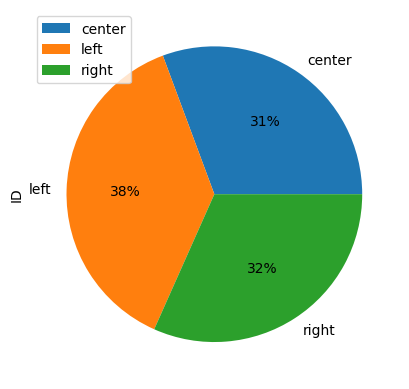

In [4]:
bias_raw_df.groupby('bias_text').count().plot(kind='pie', y='ID', autopct='%1.0f%%')

In [5]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(bias_raw_df['content_original'], bias_raw_df['bias_text'], test_size=0.2, random_state=42)

In [6]:
X_train[0]

'Besides his most recent trip to Quetta, Mr. Rahami visited Karachi, Pakistan, in 2005. Both of those cities’ reputations have become entwined with the militant groups who have sheltered there: Karachi as a haven for the Pakistani Taliban and Al Qaeda, and Quetta as the headquarters of the exiled Afghan Taliban leadership. But both cities are also home to generations of Afghans who have fled violence in their home country.\n\nMuch about his New Jersey life did seem unremarkable. Amarjit Singh, a limousine driver, was friends with Mr. Rahami at Edison High School. The person he knew, he said, was a determined student with an abundance of friends and a string of girlfriends. “Everyone seemed to like him,” he said. “Smart, funny, humble.”\n\nHe viewed the teenage Mr. Rahami as the prototypical immigrant, teetering between two worlds. While he wore jeans and sweatshirts like his friends and worked at a Pathmark supermarket after school, he preferred Afghan music and prayed at the mosque on

# NLTK Pre-processing

In [7]:
import nltk
nltk.download('punkt')
nltk.download('punkt_tab')
from nltk.tokenize import word_tokenize

# Tokenization
X_token_train = [word_tokenize(line)[:100] for line in X_train]
X_token_test = [word_tokenize(line)[:100] for line in X_test]

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.


In [8]:
print(X_token_train[0])

['The', 'Republican', 'Party', "'s", 'total', 'failure', 'to', 'make', 'even', 'cosmetic', 'changes', 'to', 'its', 'image', 'and', 'policy', 'agenda', 'last', 'year', 'has', 'at', 'this', 'point', 'become', 'the', 'kind', 'of', 'cliché-cum-running', 'joke', 'that', 'often', 'attaches', 'itself', 'to', 'accepted', 'truisms', 'in', 'American', 'politics', '.', 'Like', 'chucking', 'about', 'Bill', 'Clinton', "'s", 'inability', 'to', 'contain', 'himself', 'in', 'the', 'company', 'of', 'women', ',', 'or', 'noting', 'that', 'Dick', 'Cheney', 'actually', 'ran', 'the', 'show', 'during', 'George', 'W.', 'Bush', "'s", 'first', 'term', ',', 'observing', 'that', 'Republicans', 'have', 'failed', 'to', 'moderate', 'or', 'reinvent', 'themselves', 'after', 'losing', 'badly', 'in', '2012', 'is', 'the', 'kind', 'of', 'thing', 'even', 'sympathetic', 'political', 'wise', 'men', 'can', 'say']


In [9]:
nltk.download('wordnet')
from nltk.stem import WordNetLemmatizer

# Lemmatization
lemmatizer = WordNetLemmatizer()
lemma_X_train = [[lemmatizer.lemmatize(word) for word in line] for line in X_token_train]
lemma_X_test = [[lemmatizer.lemmatize(word) for word in line] for line in X_token_test]
print(lemma_X_train[0])

[nltk_data] Downloading package wordnet to /root/nltk_data...


['The', 'Republican', 'Party', "'s", 'total', 'failure', 'to', 'make', 'even', 'cosmetic', 'change', 'to', 'it', 'image', 'and', 'policy', 'agenda', 'last', 'year', 'ha', 'at', 'this', 'point', 'become', 'the', 'kind', 'of', 'cliché-cum-running', 'joke', 'that', 'often', 'attache', 'itself', 'to', 'accepted', 'truism', 'in', 'American', 'politics', '.', 'Like', 'chucking', 'about', 'Bill', 'Clinton', "'s", 'inability', 'to', 'contain', 'himself', 'in', 'the', 'company', 'of', 'woman', ',', 'or', 'noting', 'that', 'Dick', 'Cheney', 'actually', 'ran', 'the', 'show', 'during', 'George', 'W.', 'Bush', "'s", 'first', 'term', ',', 'observing', 'that', 'Republicans', 'have', 'failed', 'to', 'moderate', 'or', 'reinvent', 'themselves', 'after', 'losing', 'badly', 'in', '2012', 'is', 'the', 'kind', 'of', 'thing', 'even', 'sympathetic', 'political', 'wise', 'men', 'can', 'say']


In [10]:
nltk.download('stopwords')
from nltk.corpus import stopwords

# Remove stopwords
clear_X_train = [[word for word in line if word not in stopwords.words('english')] for line in lemma_X_train]
clear_X_test = [[word for word in line if word not in stopwords.words('english')] for line in lemma_X_test]
print(clear_X_train[0])

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


['The', 'Republican', 'Party', "'s", 'total', 'failure', 'make', 'even', 'cosmetic', 'change', 'image', 'policy', 'agenda', 'last', 'year', 'ha', 'point', 'become', 'kind', 'cliché-cum-running', 'joke', 'often', 'attache', 'accepted', 'truism', 'American', 'politics', '.', 'Like', 'chucking', 'Bill', 'Clinton', "'s", 'inability', 'contain', 'company', 'woman', ',', 'noting', 'Dick', 'Cheney', 'actually', 'ran', 'show', 'George', 'W.', 'Bush', "'s", 'first', 'term', ',', 'observing', 'Republicans', 'failed', 'moderate', 'reinvent', 'losing', 'badly', '2012', 'kind', 'thing', 'even', 'sympathetic', 'political', 'wise', 'men', 'say']


In [11]:
from sklearn.feature_extraction.text import TfidfVectorizer

# Initiate a tfidf vectorizer object
vectorizer = TfidfVectorizer(preprocessor=' '.join)
# Fitting the training dataset and transform it
X_train_tfidf = vectorizer.fit_transform(clear_X_train)
# Transform the test dataset
X_test_tfidf = vectorizer.transform(clear_X_test)

print(X_train_tfidf.shape)

(240, 4892)


In [12]:
print(X_train_tfidf[0])

  (0, 1445)	0.042751857769983796
  (0, 1216)	0.07597014611802036
  (0, 1114)	0.11998413632775198
  (0, 4597)	0.12887868087724458
  (0, 2734)	0.12887868087724458
  (0, 3370)	0.10573592246045294
  (0, 2660)	0.17707566324186405
  (0, 2267)	0.15310055670504655
  (0, 2066)	0.10573592246045294
  (0, 3071)	0.09223239743492789
  (0, 3764)	0.1080360426032575
  (0, 1666)	0.1423822059027696
  (0, 3256)	0.08853783162093203
  (0, 4884)	0.07138975916094084
  (0, 2958)	0.056255382795508846
  (0, 3758)	0.11334071337933435
  (0, 1879)	0.11334071337933435
  (0, 3233)	0.2847644118055392
  (0, 2119)	0.15310055670504655
  (0, 2322)	0.15310055670504655
  (0, 4127)	0.12887868087724458
  (0, 3210)	0.1347774149838882
  (0, 3587)	0.1080360426032575
  (0, 1817)	0.15310055670504655
  (0, 1608)	0.1423822059027696
  :	:
  (0, 4860)	0.11998413632775198
  (0, 3551)	0.15310055670504655
  (0, 488)	0.1347774149838882
  (0, 352)	0.15310055670504655
  (0, 1638)	0.12405906418161129
  (0, 3924)	0.1423822059027696
  (0, 4239

In [13]:
import gensim

D = gensim.corpora.Dictionary(clear_X_train)
print(D)

Dictionary<5062 unique tokens: ["'s", ',', '.', '2012', 'American']...>


In [14]:
train_indices = [[D.token2id[t] for t in line] for line in clear_X_train]
test_indices = [[D.token2id[t] if t in D else len(D) for t in line] for line in clear_X_test]

import torch
import torch.nn as nn
from torch.nn.utils.rnn import pad_sequence

train_tensor = pad_sequence([torch.tensor(line) for line in train_indices],
                            batch_first=True,
                            padding_value=len(D)+2)
test_tensor = pad_sequence([torch.tensor(line) for line in test_indices],
                           batch_first=True,
                           padding_value=len(D)+2)

X_train_seq = nn.functional.one_hot(train_tensor)
X_test_seq = nn.functional.one_hot(test_tensor)

print(X_train_seq.shape)
print(X_test_seq.shape)

torch.Size([240, 84, 5065])
torch.Size([60, 81, 5065])


# Baseline Models with sklearn

In [15]:
from sklearn.linear_model import RidgeClassifier
from sklearn.dummy import DummyClassifier
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score

ridge_classifier = RidgeClassifier()
ridge_classifier.fit(X_train_tfidf, y_train)

RidgeClassifier()

In [16]:
ridge_classifier_prediction = ridge_classifier.predict(X_test_tfidf)

In [17]:
ridge_classifier_accuracy = accuracy_score(y_test, ridge_classifier_prediction)
ridge_classifier_f1 = f1_score(y_test, ridge_classifier_prediction, average='weighted')

print(f"Ridge Classifier Accuracy: {ridge_classifier_accuracy}")
print(f"Ridge Classifier F1 Score: {ridge_classifier_f1}")

Ridge Classifier Accuracy: 0.43333333333333335
Ridge Classifier F1 Score: 0.4271650961306134


In [18]:
dummy_classifer = DummyClassifier(strategy='most_frequent')
dummy_classifer.fit(X_train_tfidf, y_train)

DummyClassifier(strategy='most_frequent')

In [19]:
dummy_classifer_prediction = dummy_classifer.predict(X_test_tfidf)

dummy_classifer_accuracy = accuracy_score(y_test, dummy_classifer_prediction)
dummy_classifer_f1 = f1_score(y_test, dummy_classifer_prediction, average='weighted')

print(f"Dummy Classifier Accuracy: {dummy_classifer_accuracy}")
print(f"Dummy Classifier F1 Score: {dummy_classifer_f1}")

Dummy Classifier Accuracy: 0.4
Dummy Classifier F1 Score: 0.22857142857142856


# RNN with LSTM


In [20]:
import numpy as np
# Define the custom mapping
custom_mapping = {'left': 0, 'center': 1, 'right': 2}

# Map the y_train and y_test using the custom mapping
y_train_mapped = [custom_mapping[label] for label in y_train]
y_test_mapped = [custom_mapping[label] for label in y_test]

# Convert to numpy arrays if needed (optional for some models)
y_train_encoded = np.array(y_train_mapped)
y_test_encoded = np.array(y_test_mapped)

# Print the custom mapping (optional)
print(custom_mapping)  # {'left': 0, 'center': 1, 'right': 2}


{'left': 0, 'center': 1, 'right': 2}


In [34]:
import torch.nn as nn

# Using super to use the net like a layer (inherit nn.Module)
class LSTMModel(nn.Module):
  def __init__(self, input_size, hidden_size=128, num_of_classes=3): # Default hidden_layer size is 128 nodes
    super(LSTMModel, self).__init__()
    self.hidden_size = hidden_size
    # Define the RNN layer as LSTM
    self.rnn_layer = nn.LSTM(input_size,
                             hidden_size,
                             num_layers=5,
                             batch_first=True,
                             dropout=0.2)
    # Define the output layer
    self.output_layer = nn.Linear(hidden_size, num_of_classes)

  def forward(self, x):
      _, (hidden, _) = self.rnn_layer(x)  # Use the final hidden state
      return self.output_layer(hidden[-1])  # Output logits (no Softmax)



In [35]:
lr = 0.0001 # Learning rate
epochs = 1000 # Training epochs

input_size = X_train_seq.shape[-1] # Extract the last dimension


model = LSTMModel(input_size).to("cuda:0")

loss_func = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=lr)

In [36]:
model

LSTMModel(
  (rnn_layer): LSTM(5065, 128, num_layers=5, batch_first=True, dropout=0.2)
  (output_layer): Linear(in_features=128, out_features=3, bias=True)
)

In [37]:
# Putting labels in tensors
y_train_tensor = torch.LongTensor(y_train_encoded)
y_test_tensor = torch.LongTensor(y_test_encoded)

# Repeat the learning process for the number of epochs
for e in range(epochs):
    # Forward pass
    predictions = model(X_train_seq.float().to("cuda:0"))
    # Calculate the loss -- the squeeze ensures the dimensions are consistent
    loss = loss_func(torch.squeeze(predictions), y_train_tensor.to("cuda:0"))

    # Model clean gradient
    optimizer.zero_grad()
    # Model backward pass to get the gradient
    loss.backward()
    # Model updating weights
    optimizer.step()

    # Print the training process
    if e % 20 == 0:
        print("Epoch:", e, "loss:", loss.item())

Epoch: 0 loss: 1.0998153686523438
Epoch: 20 loss: 1.0955870151519775
Epoch: 40 loss: 1.094909429550171
Epoch: 60 loss: 1.0940083265304565
Epoch: 80 loss: 1.0853691101074219
Epoch: 100 loss: 0.9897974729537964
Epoch: 120 loss: 0.6369600296020508
Epoch: 140 loss: 0.31155017018318176
Epoch: 160 loss: 0.08215758204460144
Epoch: 180 loss: 0.02653883770108223
Epoch: 200 loss: 0.16993124783039093
Epoch: 220 loss: 0.02275862731039524
Epoch: 240 loss: 0.01607750728726387
Epoch: 260 loss: 0.013843596912920475
Epoch: 280 loss: 0.01209555845707655
Epoch: 300 loss: 0.010749437846243382
Epoch: 320 loss: 0.009642771445214748
Epoch: 340 loss: 0.00874677486717701
Epoch: 360 loss: 0.007883272133767605
Epoch: 380 loss: 0.007153292652219534
Epoch: 400 loss: 0.006674355361610651
Epoch: 420 loss: 0.0060766832903027534
Epoch: 440 loss: 0.005673241801559925
Epoch: 460 loss: 0.005278545897454023
Epoch: 480 loss: 0.004920837469398975
Epoch: 500 loss: 0.0046057081781327724
Epoch: 520 loss: 0.004291203338652849
E

In [38]:
from sklearn import metrics
# Forward pass on test set
y_pred = model(X_test_seq.float().to("cuda:0"))


# Convert model output to predicted class indices
y_pred_classes = torch.argmax(y_pred, dim=1)

# Convert ground truth to numpy
y_test_numpy = y_test_tensor.cpu().numpy()

# Calculate accuracy
test_accuracy = metrics.accuracy_score(y_test_numpy, y_pred_classes.cpu().numpy())
print("Test Accuracy:", test_accuracy)

f1 = f1_score(y_test_numpy, y_pred_classes.cpu(), average='weighted')
print(f"F1 Score: {f1}")


Test Accuracy: 0.4
F1 Score: 0.22857142857142856


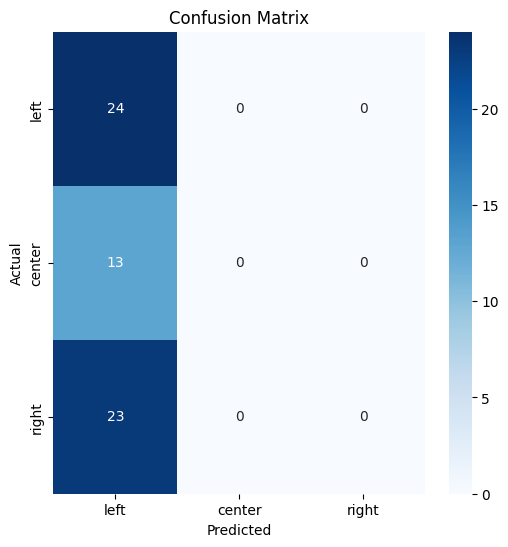

In [39]:
import numpy as np
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Sample predicted labels (this would be from your model after predictions)
# Assuming you have your model predictions stored in y_pred
# For example:
y_pred = y_pred.cpu().detach().numpy()  # Model's raw outputs

# If the outputs are probabilities, convert them to class labels (using argmax if necessary)
y_pred_labels = np.argmax(y_pred, axis=1)  # Get the class index with the highest probability


# Generate the confusion matrix
cm = confusion_matrix(y_test_encoded, y_pred_labels)

# Plot the confusion matrix using Seaborn
plt.figure(figsize=(6,6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=["left", "center", "right"], yticklabels=["left", "center", "right"])
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()
